In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import seaborn

In [27]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

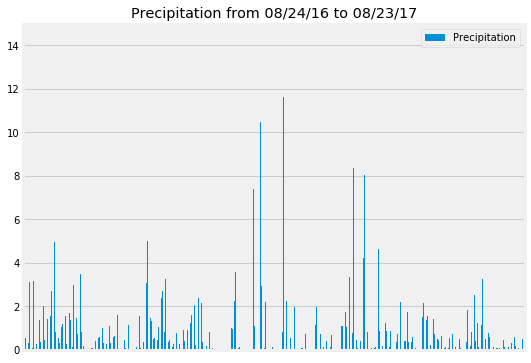

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#latest_date[0]

# Perform a query to retrieve the data and precipitation scores
prcp_year = session.query(func.strftime("%Y-%m-%d",Measurement.date), func.sum(Measurement.prcp))\
            .filter(Measurement.date.between('2016-08-24','2017-08-23')).group_by(Measurement.date)\
            .order_by(Measurement.date).all()
#prcp_year
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_year_df = pd.DataFrame(prcp_year, columns=['Date', 'Precipitation'])
prcp_year_df.set_index(['Date'], inplace=True)
#prcp_year_df

# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = prcp_year_df.plot(kind='bar', figsize=(8,6))
xticks = precip_plot.xaxis.set_visible(False)
plt.xlabel('Dates (08/24/16 to 08/23/17)')
plt.title('Precipitation from 08/24/16 to 08/23/17')
plt.show()

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_year_df.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [62]:
# Design a query to show how many stations are available in this dataset?
#session.query(Station).first().__dict__
num_stations = session.query(func.count(Station.station)).all()
num_stations

[(9)]

In [61]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
num_act_stations = session.query(Measurement.station ,func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
num_act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_calc_station = num_act_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == temp_calc_station).all()

[(54.0, 85.0, 71.66378066378067)]

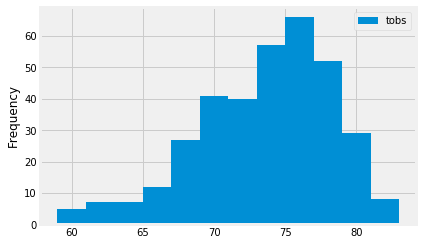

In [82]:
tobs_obs = session.query(Measurement.tobs)\
               .filter(Measurement.date.between('2016-08-24','2017-08-23'))\
               .filter(Measurement.station == 'USC00519281')
tobs_list = []
for row in tobs_obs:
    tobs_list.append(row[0])

plt.hist(tobs_list, bins=12, label='tobs')
plt.ylabel("Frequency")
plt.legend()
#plt.savefig("Images/station_analysis.png")
plt.show()